In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
ice = np.zeros((6, 6))
ice[2, 3] = 100
ice[3, 3] = 100
ice[5, 4] = 100
ice

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 100.,   0.]])

In [3]:
rng = np.random.default_rng()

rubble = (rng.random((6, 6)) * 100).astype(int)

rubble[ice.nonzero()] = 0

threshold = 10
rubble[rubble <= threshold] = 0
rubble

array([[42, 77, 52, 16, 35, 47],
       [14, 92, 71, 60, 99, 46],
       [67, 15,  0,  0, 98, 89],
       [43, 78, 79,  0,  0, 92],
       [83, 28, 43,  0, 97, 22],
       [24, 77, 22, 11,  0, 79]])

In [4]:
rubble_train = np.vstack(np.where(rubble.T == 0)).T
ice_train = np.vstack(ice.T.nonzero()).T

In [5]:
X_train = np.vstack([rubble_train, ice_train])

In [6]:
clf = GaussianMixture(
    n_components=1, 
    covariance_type="spherical", 
    init_params='kmeans', 
)
clf.fit(X_train)

GaussianMixture(covariance_type='spherical')

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [8]:
# display predicted scores by the model as a contour plot
x = np.linspace(0, 6)
y = np.linspace(0, 6)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

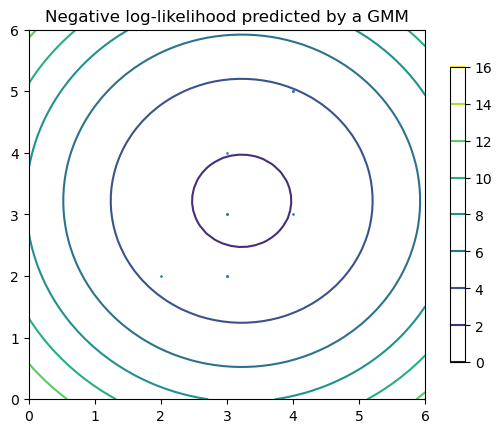

In [9]:
CS = plt.contour(
    X, Y, Z, # norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)


CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [13]:
-clf.score_samples([[3, 3],[1, 1]])

array([1.72176027, 7.54528274])